## CNN Basics

#### Code Source : https://deeplearningzerotoall.github.io/season2/lec_tensorflow.html

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

 ### A Gray Image

************* An Image - Gray *****************
image.shape (1, 3, 3, 1)


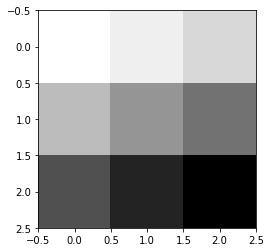

In [ ]:
print("************* An Image - Gray *****************")
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
# print("imag:\n", image)
print("image.shape", image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

### A Filter

In [ ]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 1)


### 2D Convolution with VALID option

************* Conv2D - 1 filter - VALID *****************
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


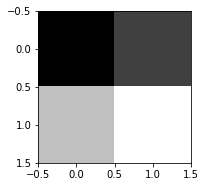

In [ ]:
print("************* Conv2D - 1 filter - VALID *****************")

conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
    
plt.show()

### 2D Convolution with SAME option

************* Conv2D - 1 filter - SAME *****************
image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


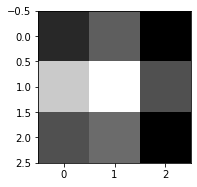

In [ ]:
print("************* Conv2D - 1 filter - SAME *****************")
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    
plt.show()

### 3 Filters

In [ ]:
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 3)


### 2D Convolution with 3 Filters

************* Conv2D - 3 filters *****************
image.shape (1, 3, 3, 1)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


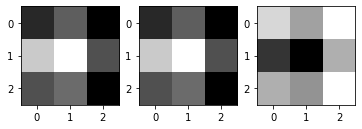

In [ ]:
print("************* Conv2D - 3 filters *****************")
print("image.shape", image.shape)

conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    
plt.show()

### Max Pooling with VALID option

In [ ]:
print("************* Max Pooling *****************")
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
#print(sess.run(pool))

************* Max Pooling *****************
(1, 1, 1, 1)


### Max Pooling with SAME option

In [ ]:
print("************* Max Pooling - SAME *****************")
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
#print(sess.run(pool))

************* Max Pooling - SAME *****************
(1, 2, 2, 1)


### MNIST Data

************* MNIST *****************


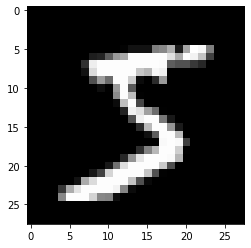

In [ ]:
print("************* MNIST *****************")
(train_x,train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
img = train_x[0]
plt.imshow(img, cmap='gray')
plt.show()


### 5개 3x3 Filters

In [ ]:
W1 = tf.Variable(tf.random.normal([3, 3, 1, 5], stddev=0.01))

### 2D Convolution with 5 Filters

************* MNIST - Conv2D *****************
(1, 14, 14, 5)


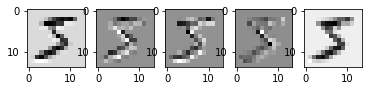

In [ ]:
print("************* MNIST - Conv2D *****************")
img = img.reshape(-1,28,28,1)

conv2d_img = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d_img.shape)

conv2d_disp = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_disp):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    
plt.show()   

### Max Pooling for 5 Con2D Images

************* MNIST - Max Pooling *****************
(1, 7, 7, 5)


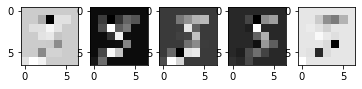

In [ ]:
print("************* MNIST - Max Pooling *****************") 
pool_img = tf.nn.max_pool(conv2d_img, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool_img.shape)

pool_disp = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_disp):
#    print(i, one_img.shape)
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')
    
plt.show()